# EEG During Mental Arithmetic Task


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.signal import hilbert, coherence
import os
import seaborn as sns

In [32]:
ruta = "/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto"
print(os.listdir(ruta))


['EEG During Mental Arithmetic Tasks', '.DS_Store', 'eeg-during-mental-arithmetic-tasks-1.0.0', 'Proyecto_profe.ipynb', 'CAP sleep data base Redstone .ipynb', '.ipynb_checkpoints']


In [33]:
for root, dirs, files in os.walk("/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto"):
    for f in files:
        if f.endswith(".edf"):
            print(os.path.join(root, f))


/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject20_1.edf
/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_2.edf
/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject04_1.edf
/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject22_2.edf
/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_1.edf
/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject20_2.edf
/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject22_1.edf
/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0/Subject04_2.edf
/Users/sofish/Documents/

In [34]:
import os

ruta = "/Users/sofish/Documents/GitHub/Neurociencias-2026-1/S06_proyecto/eeg-during-mental-arithmetic-tasks-1.0.0"
print("Contenido del folder:")
print(os.listdir(ruta))


Contenido del folder:
['Subject20_1.edf', 'Subject06_2.edf', 'Subject04_1.edf', 'Subject22_2.edf', 'Subject06_1.edf', 'Subject20_2.edf', 'Subject22_1.edf', 'Subject04_2.edf', 'RECORDS', 'Subject26_1.edf', 'Subject00_2.edf', 'Subject19_2.edf', 'Subject02_1.edf', 'Subject24_2.edf', 'Subject00_1.edf', 'Subject26_2.edf', 'Subject19_1.edf', 'Subject24_1.edf', 'Subject02_2.edf', 'Subject07_1.edf', 'Subject21_2.edf', 'Subject23_1.edf', 'Subject05_2.edf', 'Subject21_1.edf', 'Subject07_2.edf', 'Subject05_1.edf', 'Subject23_2.edf', 'Subject01_1.edf', 'Subject27_2.edf', 'Subject25_1.edf', 'Subject03_2.edf', 'Subject18_1.edf', 'Subject27_1.edf', 'Subject01_2.edf', 'Subject03_1.edf', 'Subject25_2.edf', 'Subject18_2.edf', 'Subject14_2.edf', 'Subject32_1.edf', 'subject-info.csv', 'Subject29_2.edf', 'Subject30_2.edf', 'Subject16_1.edf', 'Subject32_2.edf', 'Subject14_1.edf', 'Subject29_1.edf', 'Subject16_2.edf', 'Subject30_1.edf', 'Subject09_1.edf', 'Subject12_2.edf', 'Subject34_1.edf', 'Subject10_1.ed

In [35]:
archivos_edf = sorted([f for f in os.listdir(ruta) if f.endswith(".edf")])
print("Archivos totales:", len(archivos_edf))
print(archivos_edf[:6])  
datos = {}

for archivo in archivos_edf:
    print(f"\nCargando: {archivo}")
    path = os.path.join(ruta, archivo)
    
    raw = mne.io.read_raw_edf(path, preload=True, verbose=False)
    datos[archivo] = raw


Archivos totales: 72
['Subject00_1.edf', 'Subject00_2.edf', 'Subject01_1.edf', 'Subject01_2.edf', 'Subject02_1.edf', 'Subject02_2.edf']

Cargando: Subject00_1.edf

Cargando: Subject00_2.edf

Cargando: Subject01_1.edf

Cargando: Subject01_2.edf

Cargando: Subject02_1.edf

Cargando: Subject02_2.edf

Cargando: Subject03_1.edf

Cargando: Subject03_2.edf

Cargando: Subject04_1.edf

Cargando: Subject04_2.edf

Cargando: Subject05_1.edf

Cargando: Subject05_2.edf

Cargando: Subject06_1.edf

Cargando: Subject06_2.edf

Cargando: Subject07_1.edf

Cargando: Subject07_2.edf

Cargando: Subject08_1.edf

Cargando: Subject08_2.edf

Cargando: Subject09_1.edf

Cargando: Subject09_2.edf

Cargando: Subject10_1.edf

Cargando: Subject10_2.edf

Cargando: Subject11_1.edf

Cargando: Subject11_2.edf

Cargando: Subject12_1.edf

Cargando: Subject12_2.edf

Cargando: Subject13_1.edf

Cargando: Subject13_2.edf

Cargando: Subject14_1.edf

Cargando: Subject14_2.edf

Cargando: Subject15_1.edf

Cargando: Subject15_2.edf


In [36]:
print(raw)
print(raw.info)
print(raw.get_data().shape)


<RawEDF | Subject35_2.edf, 21 x 31000 (62.0 s), ~5.0 MiB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG Fp2, EEG F3, EEG F4, EEG F7, EEG F8, EEG T3, EEG ...
 chs: 21 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 21
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: 29, sex: 1, last_name: Subject35, birthday: 1993-01-01>
>
(21, 31000)


In [37]:
# Filtrado típico para EEG
raw.filter(1., 40.)
epochs = mne.make_fixed_length_epochs(
    raw,
    duration=2.0,
    overlap=1.0,
    preload=True
)

print("Epochs creados:", len(epochs))
data = epochs.get_data()
print(epochs)
print(len(epochs))
epochs
len(epochs)
data = epochs.get_data()
data.shape



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Not setting metadata
61 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 61 events and 1000 original time points ...
0 bad epochs dropped
Epochs creados: 61
<Epochs | 61 events (all good), 0 – 1.998 s (baseline off), ~9.8 MiB, data loaded,
 '1': 61>
61


(61, 21, 1000)

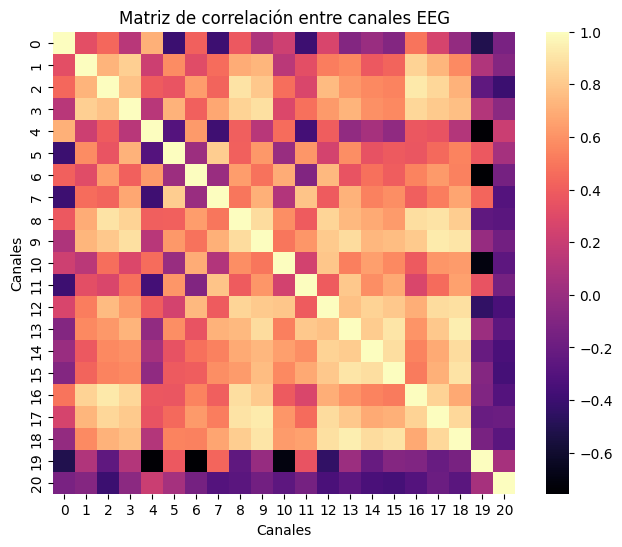

In [48]:
#Matriz de correlación entre canales
C= corr_matrix
data = epochs.get_data()   
n_epochs, n_channels, n_times = data.shape
data_mean = data.mean(axis=0)   # (n_channels, n_times)
corr_matrix = np.corrcoef(data_mean)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='magma', square=True)
plt.title("Matriz de correlación entre canales EEG")
plt.xlabel("Canales")
plt.ylabel("Canales")
plt.show()

In [53]:
import numpy as np
upper_vals = C[np.triu_indices_from(C, k=1)]
media = np.mean(upper_vals)
varianza = np.var(upper_vals)
sigma = np.std(upper_vals)

print("Media:", media)
print("Varianza:", varianza)
print("Desviación estándar:", sigma)
print("Media + 1σ:", media + sigma)
print("Media + 2σ:", media + 2*sigma)

thr_mean = media
thr_mean_sigma = media + sigma
thr_mean_2sigma = media + 2*sigma
thr_percentil = np.percentile(upper_vals, 80)  
print("Umbral por percentil (80):", thr_percentil)
mu = np.mean(C)
sigma = np.std(C)
threshold = mu + sigma  # puedes ajustar a mu + 0.5*sigma si quieres más conexiones

print("Umbral:", threshold)


B_mean = (C > thr_mean).astype(int)
B_mean_sigma = (C > thr_mean_sigma).astype(int)
B_mean_2sigma = (C > thr_mean_2sigma).astype(int)
B_percentil = (C > thr_percentil).astype(int)

print("Matriz binaria (µ):\n", B_mean)
print("Matriz binaria (µ + σ):\n", B_mean_sigma)
print("Matriz binaria (µ + 2σ):\n", B_mean_2sigma)
print("Matriz binaria (percentil):\n", B_percentil)


Media: 0.3873840407993126
Varianza: 0.1612339587421701
Desviación estándar: 0.4015394859066417
Media + 1σ: 0.7889235267059542
Media + 2σ: 1.190463012612596
Umbral por percentil (80): 0.7468256243429491
Umbral: 0.8295652883853153
Matriz binaria (µ):
 [[1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0]
 [1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0]
 [1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0]
 [1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0]
 [0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0]
 [0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0]
 [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 0 0 1 1 1 1 0 0 1 1 

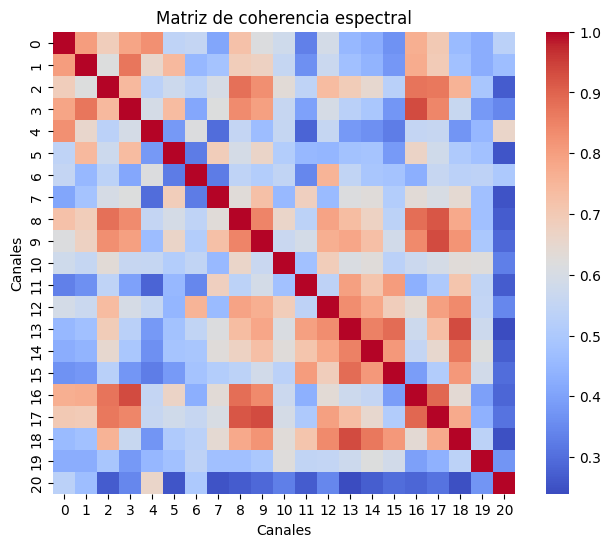

In [43]:
from scipy.signal import coherence
coh_matrix = np.zeros((n_channels, n_channels))

for i in range(n_channels):  #Coherencia canal-canal
    for j in range(n_channels):
        f, Cxy = coherence(data_mean[i], data_mean[j], fs=500)
        coh_matrix[i, j] = np.mean(Cxy)   # promedio de todas las frecuencias

plt.figure(figsize=(8, 6))
sns.heatmap(coh_matrix, cmap='coolwarm', square=True)
plt.title("Matriz de coherencia espectral")
plt.xlabel("Canales")
plt.ylabel("Canales")
plt.show()


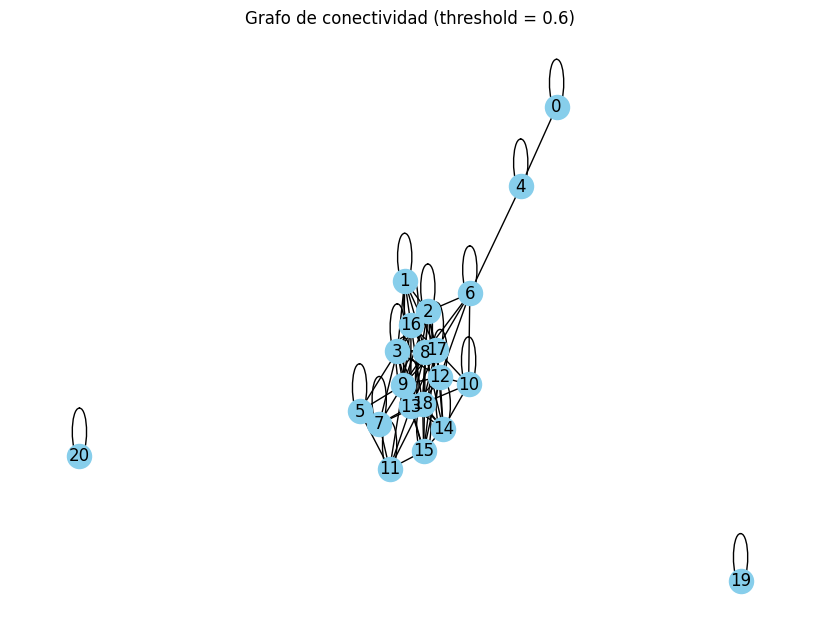

In [44]:
import networkx as nx
mat = corr_matrix   # o coh_matrix
threshold = 0.6
adj = (mat > threshold).astype(int)
G = nx.from_numpy_array(adj)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue')
plt.title("Grafo de conectividad (threshold = 0.6)")
plt.show()


In [45]:
#HUBS
degrees = dict(G.degree())
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)

print("Hubs EEG:")
for ch, d in sorted_degrees[:5]:
    print(f"Canal {ch} — grado {d}")


Hubs EEG:
Canal 9 — grado 16
Canal 17 — grado 15
Canal 18 — grado 15
Canal 8 — grado 14
Canal 12 — grado 14


In [46]:
# Comunidades
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)
print("Comunidades detectadas:")
for c in communities:
    print(list(c))


Comunidades detectadas:
[17, 18, 10, 12, 14, 15]
[5, 7, 9, 11, 13]
[16, 1, 2, 3, 8]
[0, 4, 6]
[19]
[20]


In [60]:
clustering_coeffs = nx.clustering(G)
clustering_mean = np.mean(list(clustering_coeffs.values()))
clustering_mean
eff_global = nx.global_efficiency(G)
eff_local = nx.local_efficiency(G)

print("Promedio", clustering_mean)
print("Eficiencia global:", eff_global)
print("Eficiencia local:", eff_local)




Promedio 0.6096847596847597
Eficiencia global: 0.5643650793650795
Eficiencia local: 0.8174378531521388
